In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread, concatenate_images
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tqdm.notebook as tq
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [ ]:
!unzip -oq /content/drive/MyDrive/final_dataset.zip

In [ ]:
# Import image data and category values. 
train_data_dir = '/content/content/final_dataset/train'
test_data_dir = '/content/content/final_dataset/test'
val_data_dir = '/content/content/final_dataset/val'



def parseImages(data_path):
  data_category_dirs = ["{}/{}".format(data_path, category) for category in os.listdir(data_path)]
  # print(data_category_dirs, sep = "\n")
  images = []
  categories = []
  for i, category in enumerate(tq.tqdm(data_category_dirs)):
    # print(category)
    for image_file in shuffle(os.listdir(category)[:20]):
      categories.append([os.path.basename(category)])
      image_path = "{}/{}".format(category,image_file)
      image_arr_sk = imread(image_path, as_gray=True)
      # image_arr_sk = resize(image_arr_sk, (150,150))
      images.append(image_arr_sk)
  image_list = concatenate_images(images)
  return np.reshape(image_list, (image_list.shape[0], -1)), np.array(categories)
    

train_images, train_categories = parseImages(train_data_dir)
val_images, val_categories = parseImages(val_data_dir)
test_images, test_categories = parseImages(test_data_dir)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
encoder_labels = LabelEncoder().fit(np.squeeze(train_categories))
encoding_labels_train = encoder_labels.transform(np.squeeze(train_categories))
encoding_labels_val = encoder_labels.transform(np.squeeze(val_categories))
encoding_labels_test = encoder_labels.transform(np.squeeze(test_categories))

Training Images: (8000, 50176)
Training Labels: (8000,)
Val Images: (5032, 50176)
Val Labels: (5032,)
Test Images: (963, 50176)
Test Labels: (963,)


Text(0.5, 1.0, 'AFRICAN EMERALD CUCKOO')

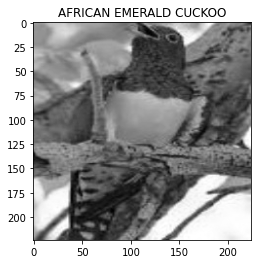

In [ ]:
print("Training Images: {}".format(train_images.shape))
print("Training Labels: {}".format(encoding_labels_train.shape))
print("Val Images: {}".format(val_images.shape))
print("Val Labels: {}".format(encoding_labels_val.shape))
print("Test Images: {}".format(test_images.shape))
print("Test Labels: {}".format(encoding_labels_test.shape))
plt.imshow(train_images[0].reshape(224,224), cmap="gray")
plt.title(train_categories[0][0])

Text(0, 0.5, 'Explained variance')

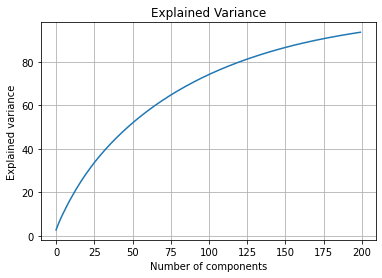

In [ ]:
#Implement LDA as we have too high dimensionality in images to 

lda = LinearDiscriminantAnalysis(n_components=200)
lda.fit(train_images[::10], encoding_labels_train[::10])
transformed_train_images = lda.transform(train_images)
transformed_val_images = lda.transform(val_images)
transformed_test_images = lda.transform(test_images)


plt.grid()
plt.plot(np.cumsum(lda.explained_variance_ratio_ * 100))
plt.title("Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('Explained variance')



In [ ]:
transformed_train_images.shape

(8000, 200)

In [ ]:

# Start training SVM model on training data

def svm(x_train, label_train, x_val=None, label_val=None, kernel="rbf", C = 1):
    classifiers_n = 100
    model1 = OneVsRestClassifier(SVC(kernel=kernel, C=C, verbose=True), n_jobs=-1)
    model1.fit(x_train,label_train)
    return model1

model_fitted1= svm(transformed_train_images, encoding_labels_train, transformed_val_images, encoding_labels_val)



[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
import time 

time_start = time.time()

results = {}
# results['train_accuracy'] = accuracy_score(encoding_labels_train[:200], model_fitted.predict(transformed_train_images[:200]))
results['val_accuracy_1'] = accuracy_score(encoding_labels_val[:963], model_fitted1.predict(transformed_val_images[:963]))
results['test_accuracy_1'] = accuracy_score(encoding_labels_test, model_fitted1.predict(transformed_test_images))
print(results)

time_end = time.time()
print(f"Total Time: {(time_end-time_start)} ")

{'val_accuracy': 0.05711318795430945, 'test_accuracy': 0.04672897196261682}
Total Time: 0.0 
